In [10]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../src")
import electrostatic
import nanonets_utils

plt.style.use(["science","bright","grid"])
# plt.style.use('seaborn-v0_8-whitegrid')

# 2D Lattice Networks

In [11]:
# Parameter and Inti
N_x, N_y, N_z       = 4,4,1
electrode_pos       = [[0,0,0],[N_x-1,0,0],[0,N_y-1,0],[N_x-1,N_y-1,0]]
# electrode_pos       = [[0,0,0],[N_x-1,0,0]]
electrode_type      = ['constant']*2
radius, radius_std  = 10.0, 0.0
eps_r, eps_s        = 2.6, 3.9
lattice             = electrostatic.electrostatic_class(electrode_type)

# Build Network and attach Electrodes
lattice.cubic_network(N_x, N_y, N_z)
lattice.set_electrodes_based_on_pos(electrode_pos, N_x, N_y)
# lattice.add_np_to_output()
lattice.init_nanoparticle_radius(radius, radius_std)
# lattice.update_nanoparticle_radius()
lattice.adjust_positions()
print(lattice)

Topology Class with 16 particles, 5 junctions.
Network Topology:
[[   1    1    4 -100 -100 -100]
 [-100    0    2    5 -100 -100]
 [-100    1    3    6 -100 -100]
 [   2    2    7 -100 -100 -100]
 [-100    0    5    8 -100 -100]
 [-100    1    4    6    9 -100]
 [-100    2    5    7   10 -100]
 [-100    3    6   11 -100 -100]
 [-100    4    9   12 -100 -100]
 [-100    5    8   10   13 -100]
 [-100    6    9   11   14 -100]
 [-100    7   10   15 -100 -100]
 [   3    8   13 -100 -100 -100]
 [-100    9   12   14 -100 -100]
 [-100   10   13   15 -100 -100]
 [   4   11   14 -100 -100 -100]]


In [12]:
lattice.dist_matrix

array([[ 0.        , 21.        , 42.        , 63.        , 21.        ,
        29.69848481, 46.95742753, 66.40783086, 42.        , 46.95742753,
        59.39696962, 75.71657678, 63.        , 66.40783086, 75.71657678,
        89.09545443],
       [21.        ,  0.        , 21.        , 42.        , 29.69848481,
        21.        , 29.69848481, 46.95742753, 46.95742753, 42.        ,
        46.95742753, 59.39696962, 66.40783086, 63.        , 66.40783086,
        75.71657678],
       [42.        , 21.        ,  0.        , 21.        , 46.95742753,
        29.69848481, 21.        , 29.69848481, 59.39696962, 46.95742753,
        42.        , 46.95742753, 75.71657678, 66.40783086, 63.        ,
        66.40783086],
       [63.        , 42.        , 21.        ,  0.        , 66.40783086,
        46.95742753, 29.69848481, 21.        , 75.71657678, 59.39696962,
        46.95742753, 42.        , 89.09545443, 75.71657678, 66.40783086,
        63.        ],
       [21.        , 29.69848481, 46

In [13]:
lattice.radius_vals

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10.])

In [14]:
G       = lattice.return_graph_object()
pos     = lattice.return_np_pos()
d_mat   = lattice.return_dist_matrix()
d_e_mat = lattice.return_electrode_dist_matrix()

Text(0, 0.5, '$y$ [nm]')

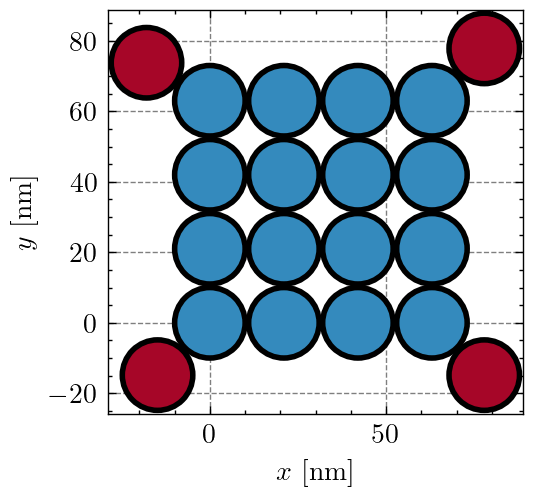

In [15]:
fig, ax = plt.subplots(dpi=200)
ax.set_aspect('equal')
for u,v in G.edges():
    x0,y0 = pos[u]; x1,y1 = pos[v]
    ax.plot([x0,x1],[y0,y1], 'black', lw=2)

# Draw nanoparticle circles
for i in range(lattice.N_particles):
    x, y = pos[i]
    circle = plt.Circle((x, y), lattice.radius_vals[i], fill=True,
                        edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.blue_color)
    ax.add_patch(circle)

# Draw electrodes and their connections
for i in range(lattice.N_particles):
    e = lattice.net_topology[i, 0]
    if e != lattice.NO_CONNECTION:
        enode = -int(e)
        x, y = pos[enode]
        # Draw electrode circle
        circ = plt.Circle((x, y), lattice.ELECTRODE_RADIUS, fill=True,
                          edgecolor='black', lw=2, zorder=2, facecolor=nanonets_utils.red_color)
        ax.add_patch(circ)

# Autoscale
xs = [p[0] for p in pos.values()]
ys = [p[1] for p in pos.values()]
pad = max(np.max(lattice.radius_vals), lattice.ELECTRODE_RADIUS) + 1
ax.set_xlim(min(xs) - pad, max(xs) + pad)
ax.set_ylim(min(ys) - pad, max(ys) + pad)
ax.set_xlabel("$x$ [nm]")
ax.set_ylabel("$y$ [nm]")

In [16]:
lattice.calc_capacitance_matrix(eps_r=eps_r, eps_s=eps_s)
c_mat = lattice.return_capacitance_matrix()
print("Capacitance Matrix:\n", np.round(c_mat,2))

10.0 10.0 21.0 2.5559367445593835
10.0 10.0 79.25278886587907 0.3711236375328516
10.0 10.0 75.94481900259525 0.3878868940907831
10.0 10.0 110.095454429505 0.2649848372130175
10.0 10.0 38.80294036547404 0.8073997681703782
10.0 10.0 58.75658569056809 0.5079707376124185
10.0 10.0 83.45190776692884 0.35185529536382604
10.0 10.0 96.396788873036 0.3034396502807895
10.0 10.0 58.75658569056808 0.5079707376124185
10.0 10.0 38.80294036547405 0.8073997681703781
10.0 10.0 95.0937762765947 0.3076940508907792
10.0 10.0 85.70690009576907 0.34232358904448806
10.0 10.0 79.25278886587907 0.3711236375328516
10.0 10.0 21.000000000000007 2.55593674455938
10.0 10.0 109.56017370899924 0.26630192057373675
10.0 10.0 79.25278886587907 0.3711236375328516
10.0 10.0 38.80294036547404 0.8073997681703782
10.0 10.0 85.70690009576907 0.34232358904448806
10.0 10.0 55.764891281477816 0.5372294975475649
10.0 10.0 96.396788873036 0.3034396502807895
10.0 10.0 50.698484809834994 0.595741939677523
10.0 10.0 67.20866419606631

In [17]:
lattice.calc_electrode_capacitance_matrix()
c_e_mat = lattice.return_electrode_capacitance_matrix()
print("Electrode Capacitance Matrix:\n", np.round(c_e_mat,2))

Electrode Capacitance Matrix:
 [[2.56 0.81 0.51 0.37 0.81 0.6  0.44 0.34 0.51 0.44 0.37 0.3  0.37 0.34
  0.3  0.26]
 [0.37 0.51 0.81 2.56 0.34 0.44 0.6  0.81 0.3  0.37 0.44 0.51 0.26 0.3
  0.34 0.37]
 [0.39 0.35 0.31 0.27 0.54 0.45 0.37 0.3  0.87 0.6  0.44 0.34 2.57 0.77
  0.49 0.36]
 [0.26 0.3  0.34 0.37 0.3  0.37 0.44 0.51 0.34 0.44 0.6  0.81 0.37 0.51
  0.81 2.56]]


In [18]:
voltage_values = [0.1,0.2,-0.5,0,0]
lattice.init_charge_vector(voltage_values)
q_vec = lattice.return_charge_vector()
print("Initial Charge Vector:\n", np.round(q_vec,2))

Initial Charge Vector:
 [ 0.14  0.01  0.06  0.42 -0.12 -0.08 -0.02  0.04 -0.32 -0.18 -0.09 -0.04
 -1.2  -0.29 -0.15 -0.08]
